# **Pandas**

У цій лекції познайомимось з бібліотекою pandas, її основними структурами, що з ними можна робити.   
Також дізнаємось про бібліотеку для роботи з векторами і матрицями - numpy, як вона повʼязана з pandas і як її можна використовувати для роботи з табличними даними.

## Що таке Pandas?

**`Pandas`** - високорівнева бібліотека на Python, призначена для дослідження, очищення, оброблення та аналізу даних, що зберігаються в табличному форматі (.csv, .tsv, .xlsx та ін.) або базах даних.

Pandas - основний інструмент роботи з табличними даними для Data Analysis та Data Science фахівця. Ми використовуємо Pandas щодня для **аналізу даних, маніпуляцій над ними та побудови моделей на них**. 

Pandas гнучкіший за Excel і дає змогу ефективно працювати з великими таблицями. Проста інтеграція Pandas з Numpy (Numeric Python - бібліотека для обчислень над векторами і матрицями), Matplotlib, Seaborn (бібліотеки візуалізації), scikit-learn (бібліотека з великою кількістю реалізованих методів машинного навчання) робить його незамінним під час розв'язання задач аналізу даних та ML задач на табличних даних.

Спершу перевіряємо, чи встановлені у вас pandas i numpy:

In [ ]:
! conda list | grep pandas

In [ ]:
! conda list | grep numpy

Якщо щось повернулось, значить - є ці бібліотеки. Якщо нема - встановлюємо одним зі способів:

In [ ]:
! pip install pandas numpy

In [ ]:
! conda install pandas numpy

Є така конвенція, що імпортуємо ми pandas саме наступним чином:

In [ ]:
import numpy as np
import pandas as pd

Так теж буде працювати, але так не прийнято:

In [ ]:
import pandas
from pandas import *

## Основні структури даних у бібліотеці

**`Series`** - одновимірний індексований масив даних деякого                фіксованого типу.

**`DataFrame`** - двовимірна структура даних, що являє собою таблицю, кожен стовпець якої містить дані одного типу. DataFrame можна розуміти як словник об'єктів типу Series. Структура DataFrame добре підходить для зберігання реальних табличних даних: рядки відповідають описам окремих об'єктів, а стовпці відповідають ознакам.


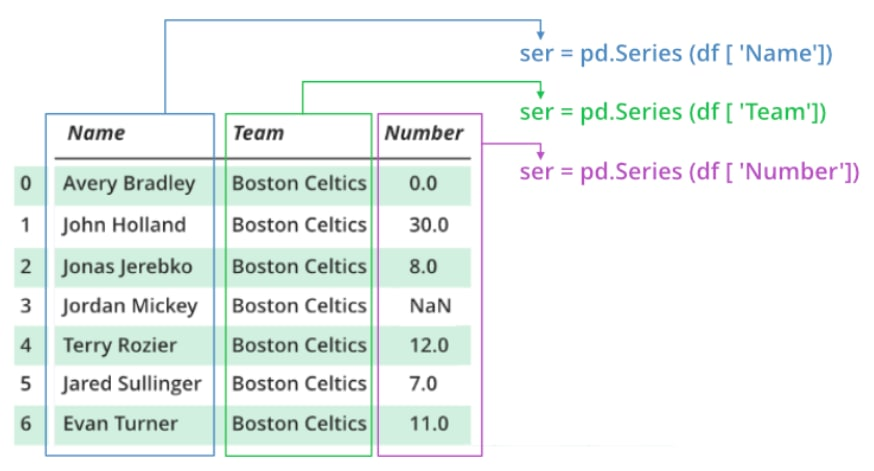

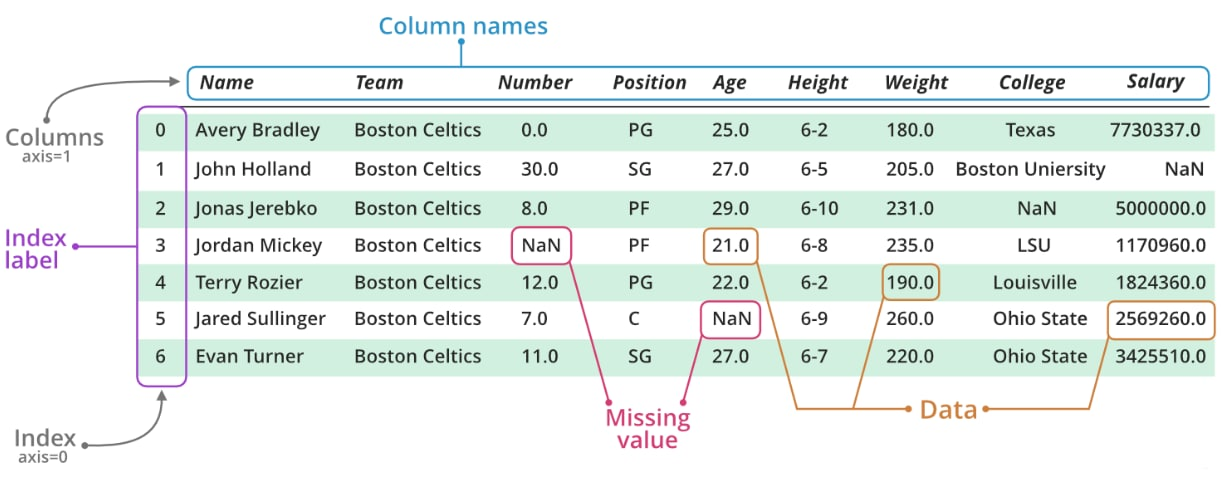

## ДЕМО: Дослідження даних за допомогою Pandas

Спочатку я покажу аналіз даних in action. А потім детально розкажу, які є можливості в pandas. І поки ви будете слухати другу частину, ви вже будете розуміти, де це можна використати в реальному аналізі.

Будемо аналізувати дані зі [змагання на Kaggle](https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction?select=train.csv).   

Оригінальний опис даних тут: https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction

Суть завдання машинного навчання: передбачити, чи буде цікава людині, в якої є медичне страхування, страховка на транспортний засіб.
Побудова моделі для прогнозування того, чи зацікавить клієнта страхування транспортних засобів, надзвичайно корисна для компанії, оскільки вона може відповідно спланувати свою комунікаційну стратегію, щоб охопити цих клієнтів і оптимізувати свою бізнес-модель і дохід.
Щоб передбачити, чи зацікавить клієнта страхування транспортного засобу, у нас є інформація про демографічні дані (стать, вік, код регіону), інформація про транспортні засоби (вік транспортного засобу, пошкодження), поліс (його вартість, канал постачання) тощо.

Завантажуємо датасет `train` собі у папку `/data/health_insurance_cross_sell_prediction/` на рівні з папкою з ноутбуками.

### Читання з файлу

In [ ]:
?pd.read_csv

In [ ]:
df = pd.read_csv('../data/health_insurance_cross_sell_prediction/train.csv', index_col='id')

Для початку дивимося на розмір датасету.

In [ ]:
type(df)

In [ ]:
df_shape = df.shape

In [ ]:
df_shape[0]

Набір даних досить великий, тому очима його весь переглядати явно не доцільно.

Дивимося на кілька записів даних, як вони виглядають. Під час роботи з великими даними зручно дивитися датафрейм частинами. Та й якщо дивитися повністю може підвиснути браузер.

In [ ]:
df.head()

In [ ]:
df

In [ ]:
df[100:110:2]

Дивимося, які у нас типи даних у колонках.

In [ ]:
df.dtypes

In [ ]:
len(df.columns)

А так можна подивитися на назви колонок, якщо треба. 

За допомогою методу `describe` можемо переглянути основні статистичні характеристики даних за кожною ознакою:   
- число заповнених (не NaN) значень, 
- середнє, 
- стандартне відхилення, 
- діапазон, 
- медіану, 
- 0.25 і 0.75 квартилі.

In [ ]:
df.describe()

Аби було зручніше переглядати, можемо змінити форматування відображення float даних:

In [ ]:
with pd.option_context("display.precision", 2):
    display(df.describe())

Зазвичай змінювати точність відображення даних для всього ноутбуку незручно, того рекомендую за потреб використовувати `pd.option_context` аби встановити потрібні параметри відображення.

DataFrame можна відсортувати за значенням однієї або декількох ознак.

In [ ]:
df.sort_values(by="Age").head()

In [ ]:
df.sort_values(by=["Age", "Previously_Insured"], ascending=[False, False]).head()

Можемо також впорядкувати назви колонок або індекси. 

In [ ]:
df.sort_index(axis=1).head()

### Відповідаємо на питання за допомогою даних

Яке запитання до даних ви б хотіли поставити з огляду на задачу?

#### Яке співвідношення в наборі даних тих, хто взяв страхування транспортного засобу до тих, хто - ні?

In [ ]:
df.Response.sum()/df.Response.count()

In [ ]:
df.Response.mean()

В середньому, 12 людей зі 100 беруть страховку тр. засобу.

#### Як відрізняється готовність взяти страхування тр. засобу в жінок та чоловіків?

In [ ]:
(
    df[
        df["Gender"] == 'Female'
    ]["Response"].mean() 

    - 

    df[
        df["Gender"] == 'Male'
    ]["Response"].mean()
)

Жінки в середньому трохи менш готові брати страхування авто. Чи це стат значима різниця - навчимось перевіряти трохи згодом.  
Але поки для орієнтира можемо порівняти цю різницю з середнім значенням змінної Response:

In [ ]:
0.03/0.12

Різниця становить чверть середнього значення готовності взяти страхування. Тож, це виглядає на суттєву різницю.

#### Який розподіл готовності взяти страхування? 
Для відповіді, нам треба булеву по факту змінну перетворити у співвідношення: з такої-то кількості людей в цій групі стільки то готові взяти страхування. Зробимо це групування по віку:

In [ ]:
(
    df
    .groupby('Age')
    .Response
    .mean()
    .describe()
)

#### В якому віці люди найбільш охоче беруть страхування авто?

In [ ]:
df.groupby('Age').Response.mean().idxmax()

У віці 38 років.

Можемо також переконатись у відповіді подивившись на дані візуально.

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))
df.groupby('Age').Response.mean().plot.bar();

Оо, схоже, що між 34 і 49 роками. А далі погоджуються на страхування авто менш охоче. Це може бути наша ЦА з точки зору віку.

#### Робота з категоріальними змінними

##### Змінна Gender

Які значення приймає змінна Gender.

In [ ]:
df.Gender.unique()

Скільки унікальних даних в цієї змінної:

In [ ]:
df.Gender.nunique()

Скільки записів відповідає кожному зі значень змінної Gender?

In [ ]:
df.Gender.value_counts()

In [ ]:
df.Gender.value_counts() / df.shape[0]

Який відсоток людей - чоловіки?

In [ ]:
df.Gender.value_counts(normalize=True)

##### Змінна Policy_Sales_Channel

Policy_Sales_Channel - категоріальна змінна, але вона за замовченням завантажилась в нас як float. Перетворімо її на категоріальну і подивимося, як розподілені її записи за значеннями.

Подивимося, які різні значення приймає змінна. 

In [ ]:
df.Policy_Sales_Channel.unique()

Перевіримо, що немає порожніх значень

In [ ]:
df[df.Policy_Sales_Channel.isna()]

In [ ]:
df.Policy_Sales_Channel = pd.Categorical(df.Policy_Sales_Channel.astype(np.int16))

Скільки записів за кожним Policy_Sales_Channel:

In [ ]:
df.Policy_Sales_Channel.value_counts()

Можемо те саме відобразити візуально. Це буде дещо більш зручно для аналізу:

In [ ]:
df.Policy_Sales_Channel.value_counts()[:30].plot.bar();

Схоже, канал продажів під id 152 - найбільш поширений. Або це значення каналу за замовченням в базі даних :)

А який відсоток людей готові купити страхуванням по кожному з каналів?

In [ ]:
channel_response_rate = df.groupby('Policy_Sales_Channel').Response.mean().sort_values(ascending=False)

In [ ]:
channel_response_rate.describe()

Є канали, в яких респонс рейт - 1! Які це канали, та скільки людей по ним купило страхування?

In [ ]:
channel_response_rate[channel_response_rate==1]

In [ ]:
response_rate_1 = channel_response_rate[channel_response_rate==1].index.tolist()

In [ ]:
response_rate_1

Зробимо таку трансформацію для спрощення (без неї нам завжди буде виводитись інформація по всім каналам).

In [ ]:
df.Policy_Sales_Channel = df.Policy_Sales_Channel.astype(np.int16)

In [ ]:
df[df.Policy_Sales_Channel.isin(response_rate_1)].groupby('Policy_Sales_Channel').size()

Який респонс рейт на найчастотнішому каналі?

In [ ]:
max_frequency_channel_id = df.Policy_Sales_Channel.value_counts().idxmax()

In [ ]:
channel_response_rate.loc[max_frequency_channel_id]

In [ ]:
channel_response_rate.iloc[3], channel_response_rate.loc[3]

In [ ]:
channel_response_rate.reset_index()[:10]

#### Чоловіки якого віку мають найдорожчі страхування?
Хочемо це дізнатись, аби знати, можливо таким клієнтам варто запропонувати знижку на страхування авто, бо вони та так платять багато за страхування життя. Чи навпаки, тим хто і так платить багато, спробувати продати страхування авто, бо для них це достатньо можу бути важливо аби платити.

In [ ]:
men_mean_annual_premium_by_age = df[df.Gender=='Male'].groupby('Age').Annual_Premium.mean()

In [ ]:
men_mean_annual_premium_by_age.idxmax()

Виходить, що в цьому наборі даних найдорожчу середню страховку беруть чоловіки в віці 82 роки. Можемо переконатись у відповіді візуально.

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))
df.groupby('Age').Annual_Premium.mean().plot.bar();

Графік до речі цікавий. Схоже, що найнижча ціна страховки в чоловіків між 29 і 36 роками, бо вони вже досвідчені, не надто молоді і не надто старі. Це гіпотеза. Її можна уточнити в спеціаліста по продукту.

#### Як розподілено середнє по Response за статтю та сукупністю колонок Vehicle_Age і Previously_Insured?

Використаємо для відповіді зводні таблиці! Це дуже зручно в даному випадку, бо хочемо статистику, загреговану за двома параметрами.

In [ ]:
pivot = df.pivot_table(index=['Gender'], columns=['Previously_Insured', 'Vehicle_Age'], values=['Response'])

In [ ]:
pivot

Параметр методу `DataFrame.pivot_table` `aggfunc` має значення 'mean' за замовченням.

Бачимо, що чоловіки в середньому частіше страхують авто. Різницю особливо видно, коли авто понад 2 роки і раніше воно не було застраховане.  
Коли авто 1-2 роки і воно раніше не було застраховане, то чоловіки і жінки майже в однаковій мірі страхують авто в середньому.

Для зручності перегляду можемо розфарбувати датафрейм:

In [ ]:
pivot.style.background_gradient(axis=0)

Можемо також подивитися, скільки людей було в кожному сегменті.

In [ ]:
pivot2 = df.pivot_table(index=['Gender'], columns=['Previously_Insured', 'Vehicle_Age'], values=['Response'], aggfunc='count')
pivot2

## Функціонал Pandas

## Series

###  Створення

**Можемо створити Series зі словника або масиву даних.**   
Приклад створення зі списку із зазначенням індексів:

In [ ]:
l = [11, 22, 33]
ser = pd.Series(data=l, index=['a', 'b', 'c'])
ser

Якщо не вказуємо індекси, вони генеруються автоматично.

In [ ]:
l = [[11,1],[22],[33,2]]
ser = pd.Series(data=l)
ser

Приклад створення зі словника:

In [ ]:
d = {'a': 1, 'b': 2, 'c': 3}
ser = pd.Series(data=d)
ser

Якщо створюємо зі словника і вказуємо індекси - можемо додати індекси, яких немає в словнику, і вибрати зі словника ті індекси, які нам потрібні.

In [ ]:
d = {'a': 1, 'b': 2, 'c': 3}
ser = pd.Series(data=d, index=['x', 'y', 'z', 'a', 'b'])
ser

In [ ]:
ser['x'] = 10

In [ ]:
ser

Створимо Series для подальшої роботи.

In [ ]:
heights = pd.Series([1.85, 1.80, 1.70, 1.64], index=["John", "Elvis", "Layla", "Karl"])
heights

Якщо викличемо values атрибут у pd.Series, отрмимаємо numpy.ndarray - N-dimensions array. Тобто вектор, або список, але який більш оптимально зберігається.

In [ ]:
arr = heights.values

In [ ]:
arr, type(arr)

values - атрибут pd.Series, а не метод, тому спроба його викликати призведе до помилки:

In [ ]:
heights.values()

Також ми можемо легко перетворити pd.Series на список:

In [ ]:
heights.tolist()

In [ ]:
heights

In [ ]:
list(heights)

In [ ]:
index = heights.index
index

In [ ]:
type(index)

In [ ]:
index.to_list()

Ми можемо вказати тип даних в pd.Series, можемо зробити це так:

In [ ]:
heights

In [ ]:
heights_str = heights.astype('str')

In [ ]:
heights_str.loc['John']

In [ ]:
arr

In [ ]:
pd.Series(arr, index=index)

Отак не спрацює:

In [ ]:
pd.Series(arr, dtype=np.int32, index=index)

### Індексація

Можемо індексувати дані багатьма різними споосбами. Наприклад, створити логічний вектор і використати його потім для фільтрації даних. Скажімо, хочемо обрати з набору даних людей з ростом більшим за 1.7:

In [ ]:
heights > 1.7

In [ ]:
heights

In [ ]:
heights[heights > 1.7]

Списки так не вміють (фільтруватись по булевому списку отак просто):

In [ ]:
heights_list = heights.to_list()

In [ ]:
heights_list

In [ ]:
heights_filter = (heights > 1.7).tolist()

In [ ]:
heights_filter

In [ ]:
heights_list[heights_filter]

Натомість якщо привести список до pd.Series або до np.array - спрацює така фільтрація:

In [ ]:
other_filter = [True, False, True, False]

In [ ]:
heights_list

In [ ]:
np.array(heights_list)[heights_filter]

In [ ]:
pd.Series(heights_list)[heights_filter]

На Series також можна доступатися до окремих елементів та робити слайси як в списках:

In [ ]:
heights[2]

In [ ]:
heights[:3]

А також можемо доступитись до записів по користувацьким індексам, які ми визначили при створенні Series:

In [ ]:
heights.John

Але якщо рядкові індекси починаються не з латинської літери чи нижнього підкреслення, або якщо в значенні індексу є пробіл, викликати значення як атрибут об'єкта Series не вийде:

In [ ]:
heights['1John'] = 1.5
heights['John The First'] = 1.5

In [ ]:
heights

In [ ]:
heights.1John

В такому випадку ми можемо вивести потрібний рядок лише отак:

In [ ]:
heights['1John']

In [ ]:
heights['John The First']

Тож, чотири альтернативні способи звернутися до одного й того самого запису:

In [ ]:
heights.John

In [ ]:
heights['John']

In [ ]:
heights.loc['John']

In [ ]:
heights[0]

### Функції над Series   

Усі функції над об'єктом `pd.Series` та будь-яким іншим обʼєктом можна переглянути використавши функцію dir:

In [ ]:
dir(heights)

In [ ]:
heights.mean(), heights.std()

А також, ми можемо виконати над обʼєктом Series функції з пакета Numpy. 
Наприклад, [тут](https://numpy.org/doc/stable/reference/routines.statistics.html) можна ознайомитись з набором статистичних функцій Numpy. 
Функціонал Numpy потрібен, коли нам не вистачає функціоналу Pandas.

In [ ]:
np.mean(heights), np.std(heights, ddof=1),  np.std(heights),  np.std(heights, ddof=0)

Можемо викликом однієї функції `describe` описати дані в `Series`.

In [ ]:
heights.describe()

Можемо додати персентилів в цей метод:

In [ ]:
np.arange(0.1,1,0.1)

In [ ]:
heights.describe(percentiles=np.arange(0.1,1,0.1))

**Що таке персентиль.**

Процентиль (або центиль) — це показник у статистиці. Він часто використовується в аналізі даних.

Це спосіб вираження місця спостереження в діапазоні інших спостережень.

Наприклад, якщо запис (обране значення з даних) потрапляє в 20-й процентиль, це означає, що 20 відсотків усіх наявних даних дорівнюють або нижчі за це значення.
Якщо значення знаходиться в 90-му процентилі, це означає, що 90 відсотків усіх інших значень були рівними або нижчими за це значення.

У статистиці процентили знаходять, беручи великий набір числових даних, упорядковуючи їх у порядку зростання, а потім розділяючи на 100 груп з рівною кількістю точок даних. Кожна з 99 точок поділу називається процентилем набору даних.
Візуалізація 10-го персентиля:

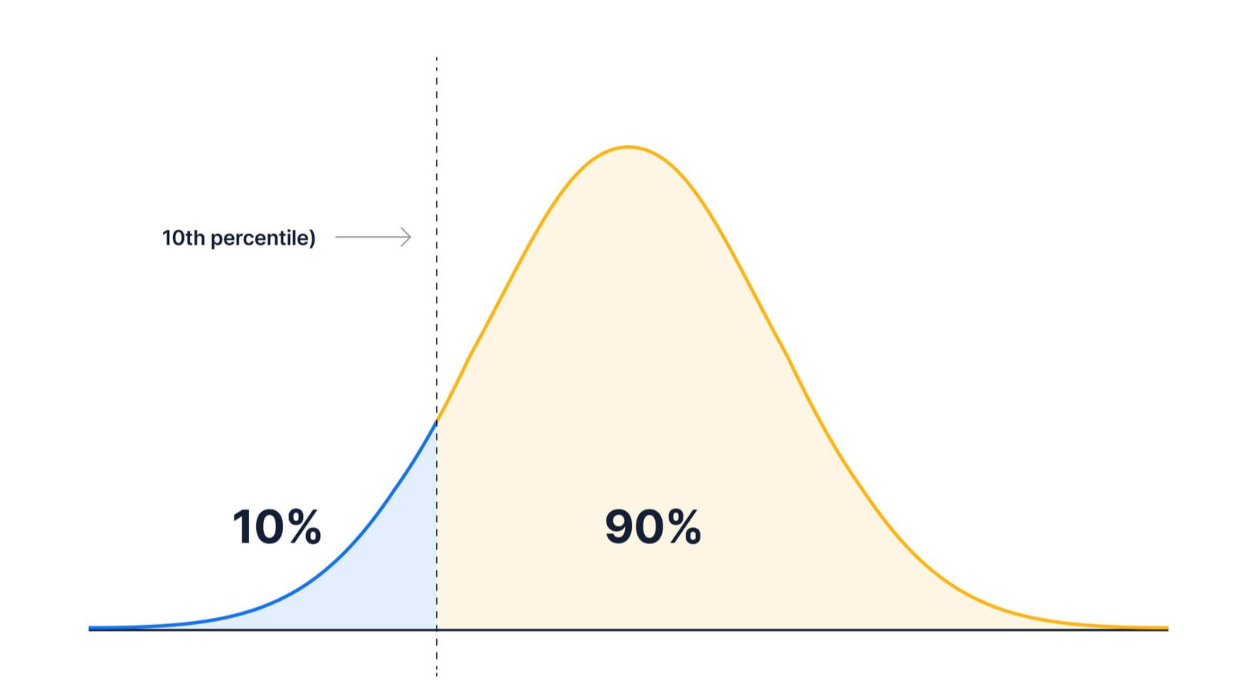

#### Конвертація pd.Series в інші формати.

Давайте для початку виведемо всі методи, які дозволяють конвертувати pd.Series в інший тип:

In [ ]:
all_attributes = np.array(dir(heights))

In [ ]:
attr_filter = ['to_' in attr for attr in all_attributes]

In [ ]:
all_attributes[attr_filter]

В список ми вже бачили, як конвертувати, подивимось на інші методи.

- в рядок

In [ ]:
print(heights.to_string())

-  в словник

In [ ]:
heights.to_dict()

- в json - цей формат використовується іноді для збереження даних , коли у нас у записів є різні набори полів. Скажімо, у одних товарів є і опис, і характеристики типу висота, ширина, вага (стіл або холодильник),
а у інших продуктів - характеристики типу колір, запах, склад (косметичні вироби, типу крему, помади).

In [ ]:
heights.to_json()

In [ ]:
heights.to_json(orient='table')

```{
    "schema": {
        "fields": [{
            "name": "index",
            "type": "string"
        }, {
            "name": "values",
            "type": "number"
        }],
        "primaryKey": ["index"],
        "pandas_version":
        "0.20.0"
    },
    "data": [{
        "index": "John",
        "values": 1.85
    }, {
        "index": "Elvis",
        "values": 1.8
    }, {
        "index": "Layla",
        "values": 1.7
    }, {
        "index": "Karl",
        "values": 1.64
    }, {
        "index": "1John",
        "values": 1.5
    }, {
        "index": "John The First",
        "values": 1.5
    }]
}```

- в csv - comma separated values - файл

In [ ]:
heights.to_csv('height.csv')

Після виконання цієї команди в нас зʼявиться новий файл в тій самій локації, де лежить запущений ноутбук.

In [ ]:
!ls

Можемо подивитись на вміст файлу.

In [ ]:
!cat height.csv 

In [ ]:
pd.read_csv('height.csv', index_col=0)

### Пропущені значення 

Series підтримує пропуски в даних.

In [ ]:
heights["Sun"] = np.nan

In [ ]:
heights

**Заповнення пропущених значень**

За замовчуванням `inplace=False`. У такому випадку, метод 
повертає структуру із внесеними змінами. Відповідно, нам треба кудись записати цю структуру. В поточну змінну зміни не внеслись.

In [ ]:
heights.fillna(heights.median())

In [ ]:
heights

Якщо `inplace=True`, то метод повертає None, і застосовані трансформації записуються в об'єкт Series/DataFrame, який ми передали в метод.

In [ ]:
heights.fillna(heights.median(), inplace=True)

In [ ]:
heights

In [ ]:
type(heights)

Так робити не можна - втратите дані.

In [ ]:
heights_test = heights.copy()

In [ ]:
heights_test

In [ ]:
heights_test = heights_test.fillna(heights_test.median(), inplace=True)

In [ ]:
print(heights_test)

In [ ]:
type(heights_test)

## DataFrame

### Створення та редагування

Варіант 1 створення: з масиву numpy, вказавши назви рядків і стовпців.

In [ ]:
dates = pd.date_range("20210101", periods=6)

In [ ]:
dates

In [ ]:
np.random.randn(6, 4)*10

In [ ]:
list("ABCD")

In [ ]:
df1 = pd.DataFrame(np.random.randn(6, 4)*10, index=dates, columns=list("ABCD"))
df1

Варіант 2 створення: зі словника numpy масивів, списків або навіть константних значень для деяких стовпчиків.

In [ ]:
[3] * 4

In [ ]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20210102"),
        "C": pd.Series(1, index=list(range(4,8)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
        "G": [[3,4]]*4
    }
)

In [ ]:
df2

In [ ]:
df2.dtypes

In [ ]:
df2.F

In [ ]:
df2.E

In [ ]:
pd.Categorical(df2.F)

### Функції датафрейма

In [ ]:
dir(df1)

Можемо легко перетворювати dataframe в numpy.array і навпаки. Іноді методи приймають на вхід саме np.array формат, тоді треба явно перетворювати тип.

In [ ]:
df1_np = df1.to_numpy()
df1_np

Розміри датафрейма:

In [ ]:
df1.size

In [ ]:
df1.shape

Перейменування колонок можна зробити будь-яким із двох способів:

In [ ]:
df1.rename(columns={'A':'X_01'},inplace=True)

In [ ]:
df1.rename({'DD':'X_02'}, axis=1)

В датафреймах axis=1 - колонки, axis=0 - рядки.

### Індексація
Звернення до елементів і отримання даних із фрейму

In [ ]:
df2

In [ ]:
# df2[4,'B'] # так звертатися не вийде, виникне помилка

Можемо звертатись наступним чином:

In [ ]:
df2.at[4, "B"]

In [ ]:
df2.B = pd.date_range('2021-01-02', periods=4)

In [ ]:
df2

In [ ]:
df2.loc[4]

In [ ]:
df2.iloc[0]

In [ ]:
df2.loc[4]['B']

In [ ]:
df2.loc[4].B

In [ ]:
df2.B.loc[4], df2.B[4], df2['B'].loc[4]

In [ ]:
df2[["A", "B"]].loc[[5,4]]

In [ ]:
df2.loc[[5,4]][['A', 'B']]

### Внесення змін у дані в датафреймі

In [ ]:
df2

In [ ]:
df2.at[5, "B"] = np.datetime64("2022-10-04")
df2

In [ ]:
df2.shape

In [ ]:
df2.loc[7] = [3.1415, "c", False,3.1415, "test", False, [6,3]]
df2

Аналогічно можна зробити за допомогою конкатенації.

In [ ]:
df2_short = df2[df2.columns[:4]]

In [ ]:
display(df2_short), display(df1)

In [ ]:
df1.rename(columns={'X_01':'A'}, inplace=True)

In [ ]:
res = pd.concat([df1, df2_short])

In [ ]:
res

Ресет індекса аби він став гарним, просто нумерованим.

In [ ]:
res.reset_index(drop=True, inplace=True)

In [ ]:
res

In [ ]:
type(res.B.iloc[8])

Контактенацію можна робити як за рядками, так і за колонками. Функція завжди шукає загальні індекси за вказаною віссю (`axis`).

In [ ]:
display(df1.index, df2.index)

In [ ]:
pd.concat([df1, df2], axis=1)

Аби гарно сконкатенувати по індексам, нам треба привести індекси до одного вигляду в обох датафреймах:

In [ ]:
df1.index = np.array(range(df1.shape[0]))+4
display(df1)

In [ ]:
df3 = pd.concat([df1, df2], axis=1)
df3

До речі, ось що буває, коли у вас колонки в датафреймі мають однакові назви: потім незрозуміло, як до них звертатися.

In [ ]:
df3['A']

Можемо перейменувати стовпці df2 і сконкатенувати після.

In [ ]:
df2.columns = [c+'_2' for c in df2.columns]

In [ ]:
df2

In [ ]:
df4 = pd.concat([df1, df2], axis=1)
df4

Можемо також виконати якусь операцію над однією або кількома колонками датафрейма.

In [ ]:
df4.A**2

In [ ]:
def first_func(x):
    return x**2 + 2

In [ ]:
first_lambda = lambda x: x**2 + 1

In [ ]:
df4['new_A'] = df4.A.apply(lambda x: x**2)
df4['new_A_2'] = df4.A.apply(first_lambda)
df4['new_A_3'] = df4.A.apply(first_func)

In [ ]:
df4[['new_A', 'new_A_2', 'new_A_3']]

In [ ]:
def pow_2(x):
    return x**2

In [ ]:
df4['new_A_2'] = df4.A.apply(lambda x: pow_2(x))

In [ ]:
df4['new_A_3'] = df4.A.apply(pow_2)

Можемо ще так:

In [ ]:
df4['new_A_4'] = df4.A.apply(pow, args=(2,))

In [ ]:
df4

Альтернативно ми могли б зробити так:

In [ ]:
df4['new_A2'] = np.power(df4.A, 2)

In [ ]:
df4

Перевірити ідентичність колонок.

In [ ]:
df4.new_A==df4.new_A2

In [ ]:
np.alltrue(df4.new_A==df4.new_A2)

Альтернативно

In [ ]:
type(df4.new_A)

In [ ]:
df4.new_A.equals(df4.new_A2)

In [ ]:
df4.new_A.equals(df4.B)

Коли хочемо зробити `apply` над кількома колонками в датафреймі:

In [ ]:
df4['new_col'] = df4.apply(lambda x: (x['A'] + x['B']) / x['C'] if x['C'] > 0 else 0, axis=1)

In [ ]:
df4

### Запис датафрейма у файл

In [ ]:
df4.to_csv('res_lecture_3.csv', index=False)

In [ ]:
!cat res_lecture_3.csv

In [ ]:
df4_new = pd.read_csv('res_lecture_3.csv')

In [ ]:
df4_new

In [ ]:
df4_new.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df4_new

In [ ]:
df5 = pd.read_csv('res_lecture_3.csv', sep=';', index_col=0)

In [ ]:
df5

### Обробка пропущених значень

In [ ]:
df1.at[7, "B"] = np.nan
df1.at[5, "C"] = np.nan
df1.at[7, "C"] = np.nan
df1

**Виведемо булеву маску для пропущених значень (True - там, де був пропуск, інакше - False):**

In [ ]:
pd.isnull(df1)

**Можна видалити рядки з пропущеними значеннями**
- де було хоча б одне

In [ ]:
df1.dropna() # той же результат, що і у випадку df1.dropna(how="any")

- за піднабором стовпчиків

In [ ]:
df1.dropna(subset=['B'])

- параметр `thresh=N` - означає, що колонці треба хоча б N колонки з не NA значеннями, щоб "вижити"

In [ ]:
df1.dropna(thresh=3)

**Пропуски можна замінити якимось значенням.**

In [ ]:
df1.fillna(0)

In [ ]:
df1.fillna('NA')

Ось так можемо заповнити пропущені значення середніми(за колонками).

In [ ]:
df1.mean()

In [ ]:
df1.fillna(df1.mean())